# Using Prices

## Imports

In [8]:
import pandas as pd
import numpy as np
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
import finnhub
from datetime import * 

## Access stock data

In [12]:
# Setup client
finnhub_client = finnhub.Client(api_key = "bt3efpf48v6tfcs816eg")

# Stock candles
ticker = 'AAPL'
start_time = int(datetime(2021,1, 1, 0, 0).replace(tzinfo = timezone.utc).timestamp())
end_time = int(datetime(2021, 6, 21, 0, 0).replace(tzinfo = timezone.utc).timestamp())
res = finnhub_client.stock_candles(ticker, 'D', start_time, end_time)

stock = pd.DataFrame(res)
stock = stock.rename(columns = {'t':'Date', 'o':'Open', 'h':'High', 'l':'Low', 'c':'Close', 's':'status', 'v':'volumn'})
stock['Date'] = pd.to_datetime(stock['Date'], unit = 's')
stock = stock.set_index('Date')

# display(stock)

## Define Functions

In [13]:
def isSupport(df,i):
    support = df['Low'][i] < df['Low'][i-1]  and df['Low'][i] < df['Low'][i+1] \
    and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]
    return support

def isResistance(df,i):
    resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] \
    and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2] 
    return resistance

def plot_all(df):
    fig, ax = plt.subplots()

    candlestick_ohlc(ax,df.values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)

    date_format = mpl_dates.DateFormatter('%d %b %Y')
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()

    fig.tight_layout()
    
    for support in supports:
        xmin = df.index[max(0, support[0] - 10)]
        xmax = df.index[min(support[0] + 10, df.shape[0])]
        plt.hlines(support[1], xmin = xmin,\
               xmax = xmax, colors='green', alpha = 0.8, linewidth = 3)
        plt.text(x = xmin, y = support[1] - 2.5, s = str(support[1]))
        
    for resistance in resistances:
        xmin = df.index[max(0, resistance[0] - 10)]
        xmax = df.index[min(resistance[0] + 10, df.shape[0])]
        plt.hlines(resistance[1], xmin = xmin,\
               xmax = xmax, colors='red', alpha = 0.8, linewidth = 3)
        plt.text(x = xmin, y = resistance[1] + 1, s = str(resistance[1]))

## Find R&S and Plot

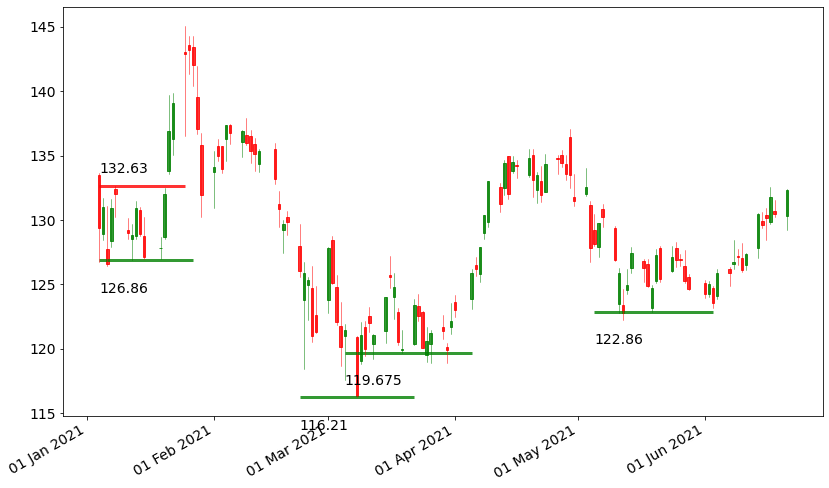

In [14]:
# set plot parameters
plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font', size=14)

stock['Date'] = pd.to_datetime(stock.index)
stock['Date'] = stock['Date'].apply(mpl_dates.date2num)

stock = stock.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]

s =  np.mean(stock['High'] - stock['Low'])

def isFarFromLevel(l):
    return np.sum([abs(l-x) < s  for x in levels]) == 0

supports = []
resistances = []
levels = []
for i in range(2, stock.shape[0]-2):
    if isSupport(stock,i):
        l = stock['Low'][i]
        if isFarFromLevel(l):
            supports.append((i,l))
            levels.append((i,l))

    elif isResistance(stock,i):
        l = stock['High'][i]
        if isFarFromLevel(l):
            resistances.append((i,l))
            levels.append((i,l))

plot_all(stock)

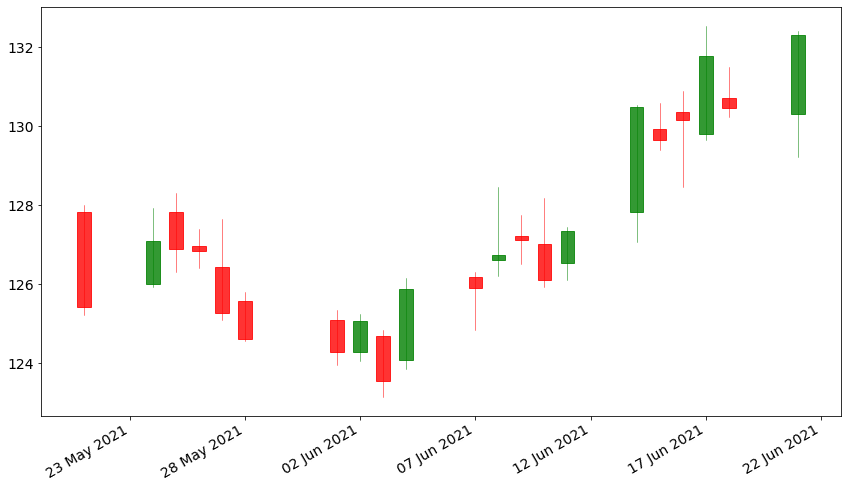

In [22]:
supports = []
resistances = []
levels = []
for i in range(2, stock.shape[0]-2):
    if isSupport(stock,i):
        l = stock['Low'][i]
        supports.append((i,l))
        levels.append((i,l))

    elif isResistance(stock,i):
        l = stock['High'][i]
        resistances.append((i,l))
        levels.append((i,l))

plot_all(stock)